# Loading the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\Real Life Violence Dataset\NonViolence\NV_1.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_10.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_100.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_1000.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_101.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_102.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_103.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_104.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_105.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_106.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_107.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_108.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_109.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_11.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_110.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_111.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_112.mp4
dataset\Real Life

In [2]:
import cv2
import os
import sys
import glob
from tqdm import tqdm

## Extract Frames from violence and non violence videos and store them in data folder

In [3]:
PATH_violence = r"dataset/real life violence situations/Real Life Violence Dataset/Violence/"

In [4]:
os.makedirs('data/Violence',exist_ok=True)
for path in tqdm(glob.glob(PATH_violence+'/*')):
    fname = os.path.basename(path).split('.')[0]
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
        if count % 5 == 0:
            cv2.imwrite("data/Violence/{}-{}.jpg".format(fname,str(count).zfill(4)),image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1

In [4]:
PATH_nonviolence = r"dataset/real life violence situations/Real Life Violence Dataset/NonViolence/"

In [21]:
os.makedirs('data/NonViolence',exist_ok=True)
for path in tqdm(glob.glob(PATH_nonviolence+'/*')):
    fname = os.path.basename(path).split('.')[0]
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
        if count % 5 == 0:
            cv2.imwrite("data/NonViolence/{}-{}.jpg".format(fname,str(count).zfill(4)),image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1

100%|██████████| 1000/1000 [03:53<00:00,  4.28it/s]


In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### Randomly Display 10 images from violence videos and 10 images from non violence videos

import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


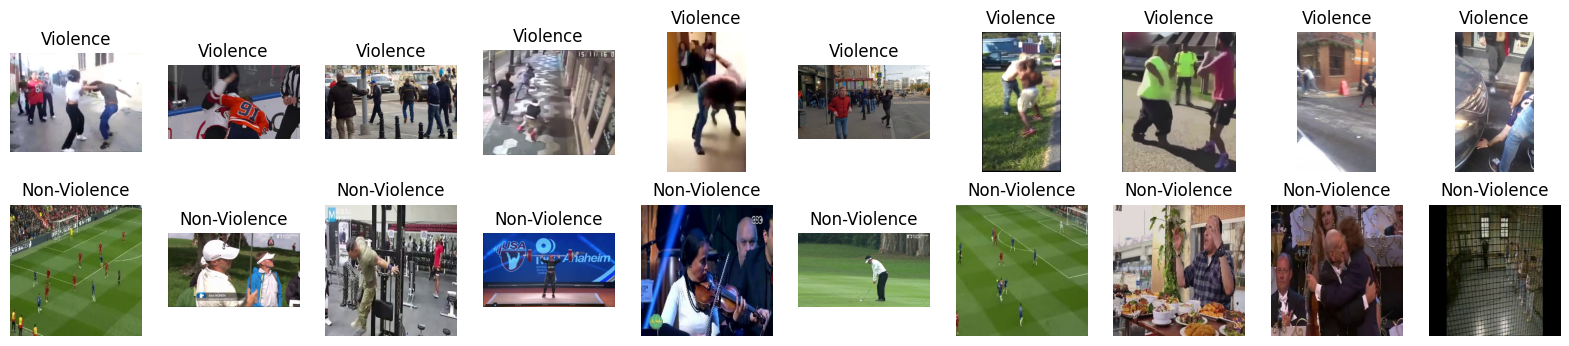

In [6]:
violence_dir = "data/violence"
nonviolence_dir = "data/nonviolence"

violence_images = [os.path.join(violence_dir, f) for f in os.listdir(violence_dir) if os.path.isfile(os.path.join(violence_dir, f))]
nonviolence_images = [os.path.join(nonviolence_dir, f) for f in os.listdir(nonviolence_dir) if os.path.isfile(os.path.join(nonviolence_dir, f))]

random_violence_images = random.sample(violence_images, 10)
random_nonviolence_images = random.sample(nonviolence_images, 10)

fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i, image_path in enumerate(random_violence_images):
    ax = axes[0, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title("Violence")
    ax.axis('off')

for i, image_path in enumerate(random_nonviolence_images):
    ax = axes[1, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title("Non-Violence")
    ax.axis('off')

plt.show()

In [7]:
import matplotlib
import tensorflow
from tensorflow import keras
matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications import ResNet50,MobileNetV2,MobileNet,InceptionV3
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
import argparse
import pickle
import cv2
import os

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [9]:
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [12]:
args = {
    "dataset": "data",
    "model": "model/violence_model.h5",
    "label-bin": "model/lb.pickle",
    "epochs": 7,
    "plot": "plot.png"
    
}


In [13]:
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS = set(["Violence", "NonViolence"])

In [14]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print('-'*100)
print("[INFO] loading images...")
print('-'*100)
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

----------------------------------------------------------------------------------------------------
[INFO] loading images...
----------------------------------------------------------------------------------------------------


## Resizing the images

In [15]:
# loop over the image paths
for imagePath in tqdm(imagePaths[::]):
    # imagePath : file name ex) V_123
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2] # Violence / NonViolence

    # if the label of the current image is not part of of the labels
    # are interested in, then ignore the image
    if label not in LABELS:
        continue

    # load the image, convert it to RGB channel ordering, and resize
    # it to be a fixed 224x224 pixels, ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

100%|██████████| 57844/57844 [04:57<00:00, 194.62it/s]


In [16]:
# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [17]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

LabelBinarizer returns output as numpy array. LabelBinarizer is used for one-hot encoding of categorical variables.

In [18]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

## Training Data Augmentation

In [19]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [20]:
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()

In [21]:
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

## Load InceptionV3 model

In [22]:
# load the InceptionV3 network, ensuring the head FC layer sets are left
# off
baseModel = InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [23]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

In [24]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [25]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
model.trainable = True

## Compile the model

In [26]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable)
print('-'*100)
print("[INFO] compiling model...")
print('-'*100)
opt = SGD(learning_rate=1e-4, momentum=0.9, decay=1e-4 / args["epochs"])
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print(model.summary())

----------------------------------------------------------------------------------------------------
[INFO] compiling model...
----------------------------------------------------------------------------------------------------


c:\Users\azam\Desktop\Fido Work\fidaenv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,852,898 (87.18 MB)

 Trainable params: 22,818,466 (87.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

None


In [27]:
len(trainX),len(testX)

(43383, 14461)

## Train the model

In [28]:
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print('-'*100)
print("[INFO] training head...")
print('-'*100)
H = model.fit(
    trainAug.flow(trainX[:20000], trainY[:20000], batch_size=8),
    steps_per_epoch=len(trainX) // 8,
    validation_data=valAug.flow(testX, testY,batch_size=8),
    validation_steps=len(testX) // 8,
    epochs=args["epochs"])

----------------------------------------------------------------------------------------------------
[INFO] training head...
----------------------------------------------------------------------------------------------------
Epoch 1/7


c:\Users\azam\Desktop\Fido Work\fidaenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2500/5422 ━━━━━━━━━━━━━━━━━━━━ 40:01 822ms/step - accuracy: 0.7250 - loss: 0.5220

C:\ProgramData\miniconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2491s 451ms/step - accuracy: 0.7673 - loss: 0.4628 - val_accuracy: 0.9130 - val_loss: 0.2175
Epoch 2/7
5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2066s 381ms/step - accuracy: 0.8812 - loss: 0.2879 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 3/7
5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2466s 455ms/step - accuracy: 0.9056 - loss: 0.2343 - val_accuracy: 0.9642 - val_loss: 0.1036
Epoch 4/7
5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2059s 380ms/step - accuracy: 0.9199 - loss: 0.2052 - val_accuracy: 1.0000 - val_loss: 0.0367
Epoch 5/7
5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2477s 457ms/step - accuracy: 0.9311 - loss: 0.1768 - val_accuracy: 0.9686 - val_loss: 0.0894
Epoch 6/7
5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2065s 381ms/step - accuracy: 0.9404 - loss: 0.1614 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 7/7
5422/5422 ━━━━━━━━━━━━━━━━━━━━ 2478s 457ms/step - accuracy: 0.9447 - loss: 0.1471 - val_accuracy: 0.9738 - val_loss: 0.0718


## Evaluate the network

In [32]:
# evaluate the network
print('-'*100)
print("[INFO] evaluating network...")
print('-'*100)
predictions = model.predict(testX[:1000], batch_size=32)
print(classification_report(testY[:1000].argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

----------------------------------------------------------------------------------------------------
[INFO] evaluating network...
----------------------------------------------------------------------------------------------------
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 758ms/step
              precision    recall  f1-score   support

 NonViolence       0.95      0.99      0.97       450
    Violence       0.99      0.96      0.98       550

    accuracy                           0.97      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [33]:
# plot the training loss and accuracy
print('-'*100)
print("[INFO] plot the training loss and accuracy...")
print('-'*100)
N = args["epochs"]
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

----------------------------------------------------------------------------------------------------
[INFO] plot the training loss and accuracy...
----------------------------------------------------------------------------------------------------


In [30]:
# serialize the model to disk
print('-'*100)
print("[INFO] serializing network...")
print('-'*100)
model.save(args["model"])

----------------------------------------------------------------------------------------------------
[INFO] serializing network...
----------------------------------------------------------------------------------------------------


In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import cv2
import os
import sys
import glob
from tqdm import tqdm
import matplotlib
import tensorflow
from tensorflow import keras
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications import ResNet50,MobileNetV2,MobileNet,InceptionV3
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
import argparse
import pickle
import cv2
import os
from tensorflow.keras.applications import DenseNet121

# Model Evaluation

In [6]:
import matplotlib.pyplot as plt
import pickle
from keras.models import load_model
# Load the saved model
model = load_model('violence_model.h5')  

In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,852,900 (87.18 MB)

 Trainable params: 22,818,466 (87.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 2 (12.00 B)

In [8]:
args = {
    "dataset": "/Users/fidaalibaig/Downloads/work1/data",
    "model": "model/violence_model.h5",
    "label-bin": "model/lb.pickle",
    "epochs": 7,
    "plot": "plot.png"
}

In [9]:
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS = set(["Violence", "NonViolence"])

In [10]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print('-'*100)
print("[INFO] loading images...")
print('-'*100)
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

----------------------------------------------------------------------------------------------------
[INFO] loading images...
----------------------------------------------------------------------------------------------------


In [11]:
import os
import cv2
from tqdm import tqdm

# Define the maximum number of images per class
MAX_IMAGES_PER_CLASS = 3000

# Initialize a dictionary to keep track of the number of images loaded for each class
loaded_images_per_class = {}

# loop over the image paths
for imagePath in tqdm(imagePaths[::]):
    # imagePath : file name ex) V_123
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]  # Violence / NonViolence

    # if the label of the current image is not part of the labels
    # we are interested in, then ignore the image
    if label not in LABELS:
        continue

    # Check if we have already loaded the maximum number of images for this class
    if label in loaded_images_per_class and loaded_images_per_class[label] >= MAX_IMAGES_PER_CLASS:
        continue

    # Increment the count for this class
    loaded_images_per_class[label] = loaded_images_per_class.get(label, 0) + 1

    # load the image, convert it to RGB channel ordering, and resize
    # it to be a fixed 224x224 pixels, ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

100%|███████████████████████████████████| 57844/57844 [00:49<00:00, 1159.27it/s]


In [12]:
# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [13]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [14]:
np.unique(labels)

array([0., 1.])

In [15]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you already have the predictions and actual labels
# Ensure that you are using the same number of samples for both predictions and actual labels
predictions = model.predict(testX[:1500], batch_size=32)
actual_labels = testY[:1500].argmax(axis=1)

# Print classification report
print('-'*100)
print("[INFO] Classification Report:")
print('-'*100)
print(classification_report(actual_labels, predictions.argmax(axis=1), target_names=lb.classes_))

# Compute and print confusion matrix
print('-'*100)
print("[INFO] Confusion Matrix:")
print('-'*100)
conf_matrix = confusion_matrix(actual_labels, predictions.argmax(axis=1))
print(conf_matrix)

47/47 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step
----------------------------------------------------------------------------------------------------
[INFO] Classification Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 NonViolence       0.97      0.99      0.98       750
    Violence       0.99      0.97      0.98       750

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500

----------------------------------------------------------------------------------------------------
[INFO] Confusion Matrix:
----------------------------------------------------------------------------------------------------
[[744   6]
 [ 20 730]]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions.argmax(axis=1))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the plot as an image file
plt.savefig('confusion_matrix.png')

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the true labels and predicted probabilities
true_labels = testY[:1500].argmax(axis=1)  # True labels
predicted_probabilities = model.predict(testX[:1500], batch_size=32)[:, 1]  # Predicted probabilities for class 1

# Create a DataFrame with true labels and predicted probabilities
data = {'True Labels': true_labels, 'Predicted Probabilities': predicted_probabilities}
df = pd.DataFrame(data)

# Plot violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='True Labels', y='Predicted Probabilities', data=df)
plt.title('Violin Plot of Predicted Probabilities by True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.savefig('violinplot.png')

47/47 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step
